# Lab3 on Digital Image Processing on the topic "Image Classification using Convolution Neural Networks"
# Лабораторная работа №3 по Цифровой Обработке Изображений на тему "Классификация изображений с использованием Свёрточных Нейронных Сетей"
### Tasks:
1. In Python 3.x, create a project and include the scikit-learn, tensorflow or pytorch library.
2. Supplement sets of pictures by option (options below). At least 20 pictures for each class (if the classification is unsatisfactory, add more). Pictures should be deliberately similar.
3. Choose an implementation and train a convolutional neural network (CNN) for classification according to the variant.
4. Conduct an experiment on image recognition with visualization of the results.
5. Conduct an information search on the Internet. Try several options for CNN architectures. Choose the best architecture from at least two. Build a graph of errors of the first and second kind based on the recognition results.
6. Add a comment to each line of code!
7. Send the program and prepared images to the teacher.
8. Prepare and send a report (title page, task, theoretical part, architectures of convolutional neural networks, sample images from a sample, program structure diagram, print screens of the main steps of the program, conclusion and conclusions, listing of the program with comments, bibliography).

### Задачи:
1. На языке Python 3.x создать проект и подключить библиотеку scikit-learn, tensorflow или pytorch.
2. Дополнить наборы картинок по варианту (варианты снизу). Минимум 20 картинок для каждого класса (при неудовлетворительной классификации добавить ещё).Картинки намеренно должны быть схожими.
3. Выбрать реализацию и обучить сверточную нейронную сеть (CNN) для классификации в соответствии свариантом.
4. Провести эксперимент по распознаванию изображений с визуализацией результатов.
5. Провести информационный поиск в Интернете. Попробовать несколько вариантов архитектур CNN. Выбрать лучшую архитектуру как минимум из двух. Построить график ошибок первого и второго рода по результатам распознавания.
6. Дать комментарий каждой строчке кода!
7. Прислать программу и подготовленныеизображения преподавателю.
8. Подготовить и прислать отчет (титульный лист, задание, теоретическая часть, архитектуры сверточных нейронных сетей, примерыизображений из выборки,  диаграмма  структуры  программы,  принтскрины  основных шагов работы программы, заключение и выводы, листинг программы с комментариями, список использованной литературы).

# CPU/GPU settings

In [1]:
from tensorflow.config.experimental import set_visible_devices


set_visible_devices([], 'GPU')

# Dataset
# Набор данных
The dataset consists of images with a resolution of 170x170 pixels and is divided into two parts: train and test. The train and test parts are divided into two classes: Chihuahuas and muffins.

Набор данных состоит из изображений разрешением 170x170 пикселей и разделён на две части: обучающую и тестовую. Обучающая и тестовая части разделены на два класса: собаки породы Чихуахуа и маффины.

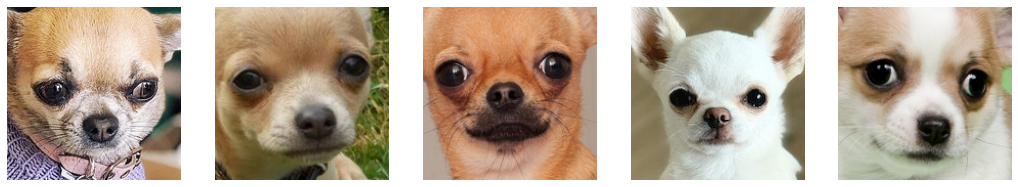

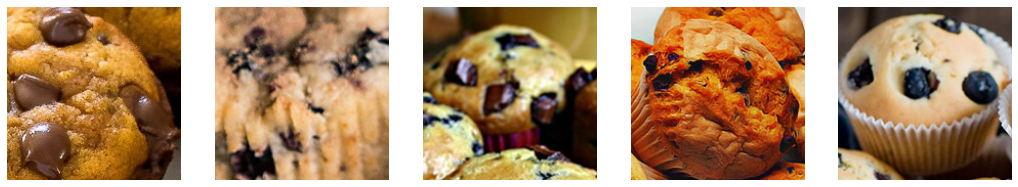

In [2]:
import os
from numpy.random import default_rng
import matplotlib.pyplot as plt
%matplotlib inline


TRAIN_PATH = os.path.join(os.getcwd(), 'dataset\\train')
TEST_PATH = os.path.join(os.getcwd(), 'dataset\\test')


def show_images(path, shape, figsize, *, suptitle=None):
    n_rows, n_columns = shape
    
    file_names = os.listdir(path)
    
    rng = default_rng()
    random_file_names = rng.choice(file_names, size=(n_rows * n_columns), replace=False)
    
    fig, axes = plt.subplots(*shape, figsize=figsize)
    axes = axes.flatten()
    for ax, random_file_name in zip(axes, random_file_names):
        random_image = plt.imread(os.path.join(path, random_file_name))
        ax.imshow(random_image)
        ax.set_axis_off()
    fig.suptitle(suptitle, fontsize=20)
    plt.show(fig)
    
    
show_images(os.path.join(TRAIN_PATH, 'Chihuahua'), (1, 5), (18, 4))
show_images(os.path.join(TRAIN_PATH, 'Muffin'), (1, 5), (18, 4))

### Тестовый набор данных

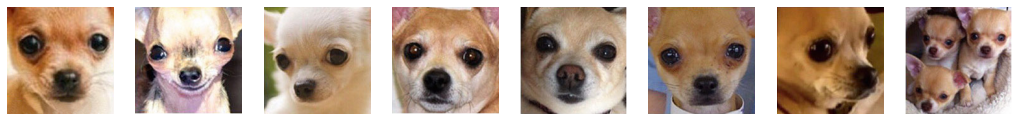

In [3]:
show_images(os.path.join(TEST_PATH, 'Chihuahua'), (1, 8), (18, 4))

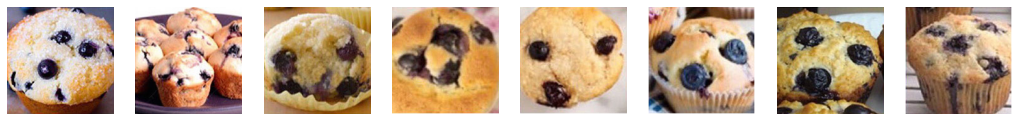

In [4]:
show_images(os.path.join(TEST_PATH, 'Muffin'), (1, 8), (18, 4))

# Data Augmentations
# Аугментации данных

Let's take a look at some examples of data augmentations. What they are.  
Давайте взглянем на примеры аугментации данных. Какие они бывают.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def show_augmentaion(augmentaion, **kwargs):
    path = os.path.join(os.getcwd(), 'Dataset\\augmentations\\{}'.format(augmentaion))
    
    # удаляем содержимое папки, если оно есть
    file_names = os.listdir(path)
    if file_names:
        for file_name in file_names:
            os.remove(os.path.join(path, file_name))
    
    augmentaion_generator = ImageDataGenerator(**kwargs)
    augmentaion_datagen = augmentaion_generator.flow_from_directory(
        TRAIN_PATH,
        target_size=(170, 170),
        save_to_dir=path,
        save_format='png',
    )
    next(augmentaion_datagen)
    show_images(path, (1, 5), (18, 4), suptitle=augmentaion)

Found 109 images belonging to 2 classes.


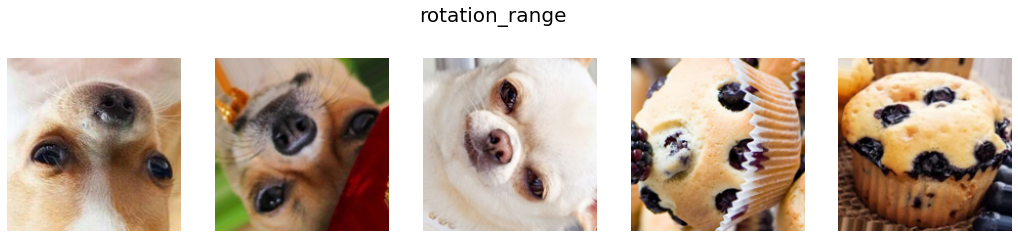

In [6]:
show_augmentaion('rotation_range', rotation_range=180)

Found 109 images belonging to 2 classes.


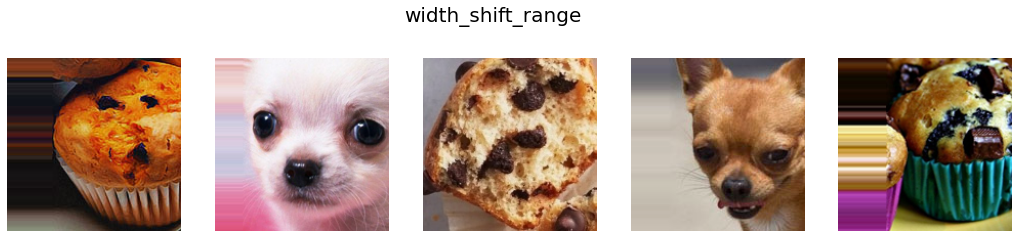

In [7]:
show_augmentaion('width_shift_range', width_shift_range=50)

Found 109 images belonging to 2 classes.


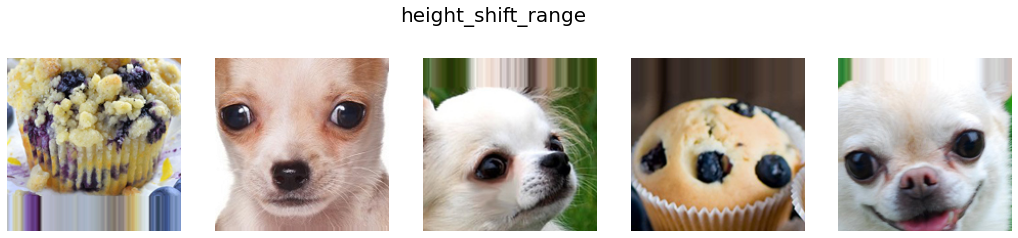

In [8]:
show_augmentaion('height_shift_range', height_shift_range=50)

Found 109 images belonging to 2 classes.


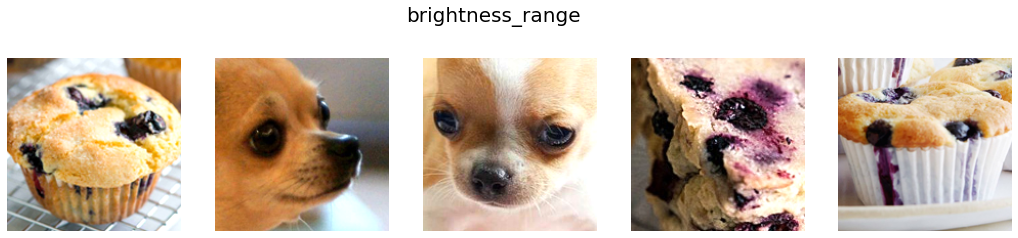

In [9]:
show_augmentaion('brightness_range', brightness_range=(1., 1.2))

Found 109 images belonging to 2 classes.


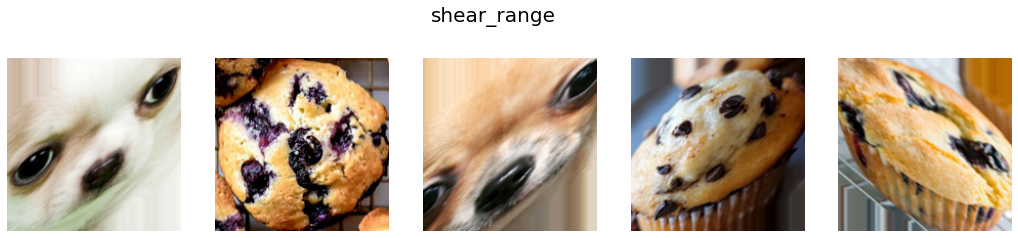

In [10]:
show_augmentaion('shear_range', shear_range=50.0)

Found 109 images belonging to 2 classes.


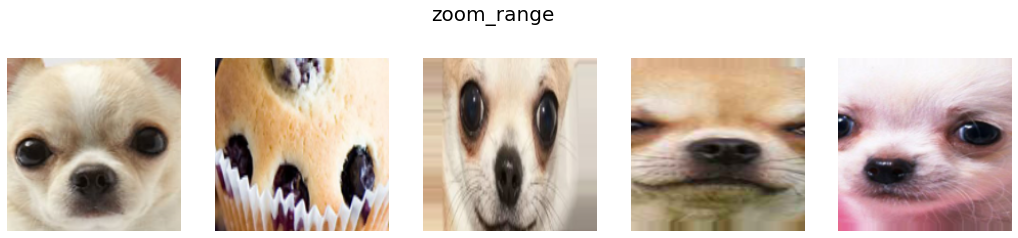

In [11]:
show_augmentaion('zoom_range', zoom_range=0.5)

Found 109 images belonging to 2 classes.


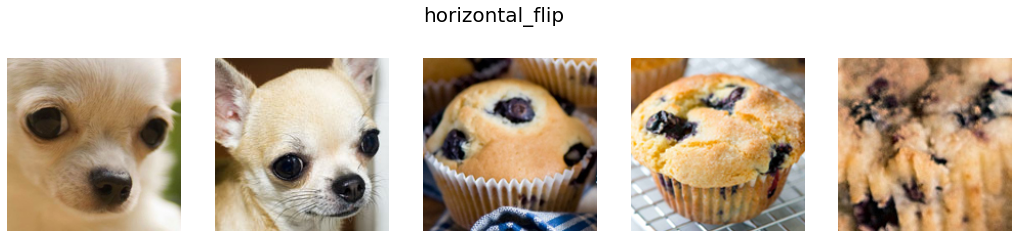

In [12]:
show_augmentaion('horizontal_flip', horizontal_flip=True)

Found 109 images belonging to 2 classes.


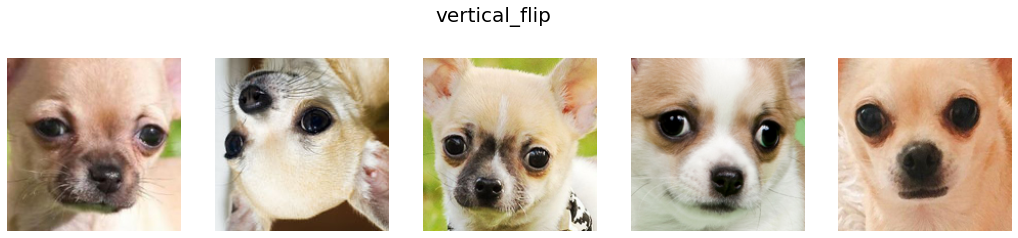

In [13]:
show_augmentaion('vertical_flip', vertical_flip=True)

Found 109 images belonging to 2 classes.


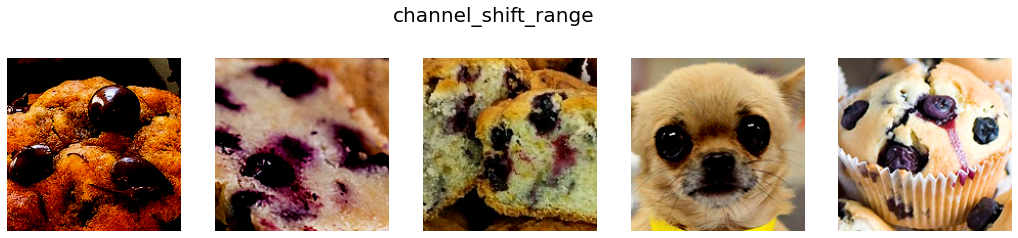

In [14]:
show_augmentaion('channel_shift_range', channel_shift_range=200.)

Found 109 images belonging to 2 classes.


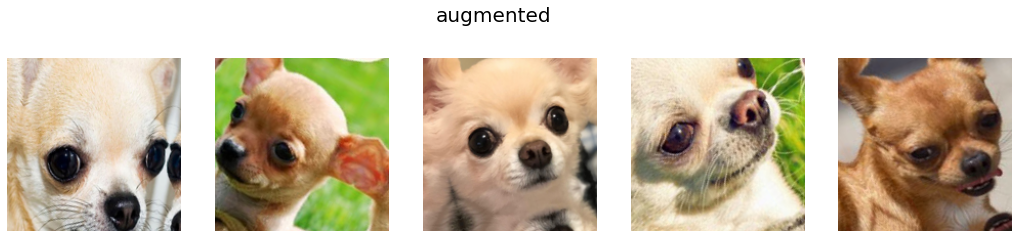

In [15]:
AUGMENTATION_SETTINGS = dict(
    rotation_range=45,
    width_shift_range=20,
    height_shift_range=20,
    zoom_range=0.2,
    fill_mode='reflect',
    horizontal_flip=True
)

show_augmentaion('augmented', **AUGMENTATION_SETTINGS)

In [16]:
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    **AUGMENTATION_SETTINGS
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [17]:
IMAGE_SIZE = (170, 170)


train_generator = train_val_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=32,
    subset='training'
)
val_generator = train_val_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=1,
)

Found 88 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Model

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Conv2D,
                                     MaxPooling2D,
                                     Flatten,
                                     Dense,
                                     Dropout)


LAYER_WIDTH_32 = 32
LAYER_WIDTH_64 = 64
INPUT_SHAPE = (170, 170, 3)
KERNEL_SIZE = (3, 3)
POOL_SIZE = (2, 2)


model_32 = Sequential(
    [
        Conv2D(
            filters=LAYER_WIDTH_32,
            kernel_size=KERNEL_SIZE,
            padding='same',
            input_shape=INPUT_SHAPE,
            activation='relu',
            use_bias=True
        ),
        MaxPooling2D(pool_size=POOL_SIZE),
        Conv2D(
            filters=LAYER_WIDTH_32,
            kernel_size=KERNEL_SIZE,
            padding='same',
            activation='relu',
            use_bias=True
        ),
        MaxPooling2D(pool_size=POOL_SIZE),
        Flatten(),
        Dense(LAYER_WIDTH_32, activation='relu'),
        Dropout(0.5),
        Dense(LAYER_WIDTH_32, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax'),
    ]
)

model_64 = Sequential(
    [
        Conv2D(
            filters=LAYER_WIDTH_64,
            kernel_size=KERNEL_SIZE,
            padding='same',
            input_shape=INPUT_SHAPE,
            activation='relu',
            use_bias=True
        ),
        MaxPooling2D(pool_size=POOL_SIZE),
        Conv2D(
            filters=LAYER_WIDTH_64,
            kernel_size=KERNEL_SIZE,
            padding='same',
            activation='relu',
            use_bias=True
        ),
        MaxPooling2D(pool_size=POOL_SIZE),
        Flatten(),
        Dense(LAYER_WIDTH_64, activation='relu'),
        Dropout(0.5),
        Dense(LAYER_WIDTH_64, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax'),
    ]
)

model_32.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_64.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

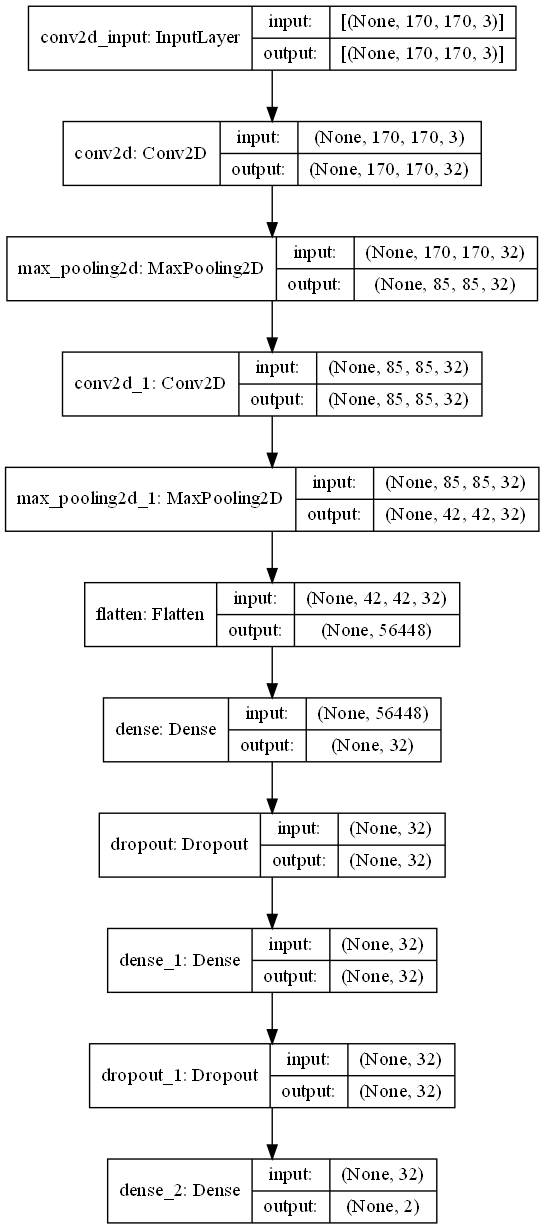

In [19]:
from tensorflow.keras.utils import plot_model


plot_model(model_32, to_file='model_32.png', show_shapes=True, rankdir="TB", dpi=100)

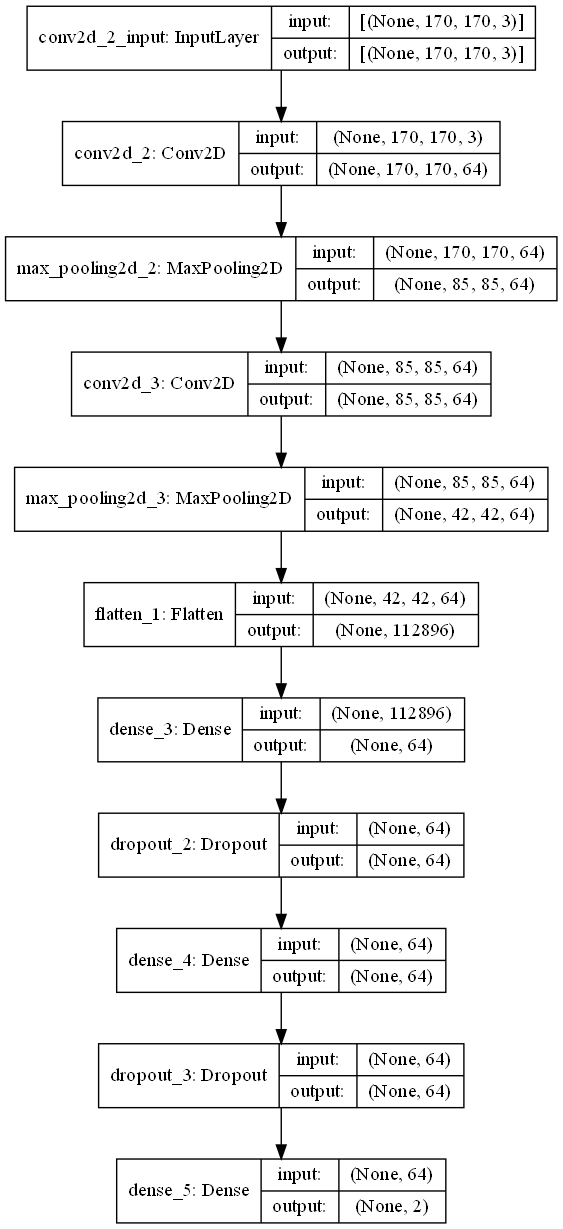

In [20]:
plot_model(model_64, to_file='model_64.png', show_shapes=True, rankdir="TB", dpi=100)

# Training

In [21]:
from tensorflow import device
from tensorflow.keras.callbacks import ModelCheckpoint


MODEL_32_PATH = os.path.join(os.getcwd(), 'model_32.hdf5')
MODEL_64_PATH = os.path.join(os.getcwd(), 'model_64.hdf5')


EPOCHS = 250


checkpoint_32 = ModelCheckpoint(
    filepath=MODEL_32_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)
checkpoint_64 = ModelCheckpoint(
    filepath=MODEL_64_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)
callbacks_list_32 = [checkpoint_32]
callbacks_list_64 = [checkpoint_64]

history_32 = model_32.fit(
    train_generator,
    epochs=EPOCHS,
    verbose=0,
    callbacks=callbacks_list_32,
    validation_data=val_generator
)
history_64 = model_64.fit(
    train_generator,
    epochs=EPOCHS,
    verbose=0,
    callbacks=callbacks_list_64,
    validation_data=val_generator
)

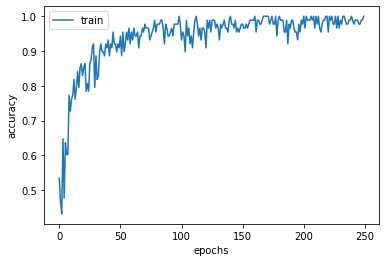

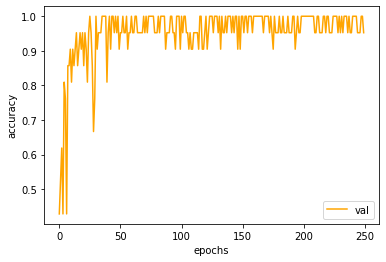

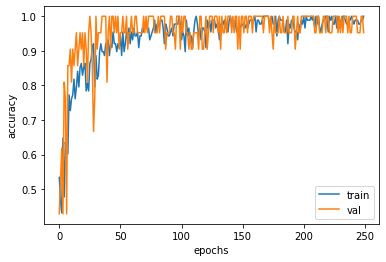

In [22]:
def plot_history(history, mode):
    ax1 = plt.subplot()
    ax1.plot(history.history['%s' % mode])
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('%s' % mode)
    ax1.legend(['train'])
    plt.show()
    
    ax2 = plt.subplot()
    ax2.plot(history.history['val_%s' % mode], color='orange')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('%s' % mode)
    ax2.legend(['val'])
    plt.show()
    
    ax3 = plt.subplot()
    ax3.plot(history.history['%s' % mode])
    ax3.plot(history.history['val_%s' % mode])
    ax3.set_xlabel('epochs')
    ax3.set_ylabel('%s' % mode)
    ax3.legend(['train', 'val'])
    plt.show()


plot_history(history_32, 'accuracy')

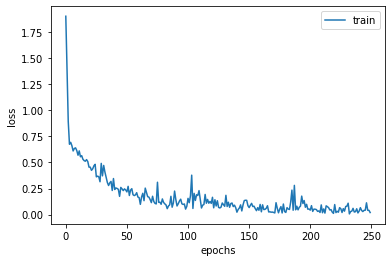

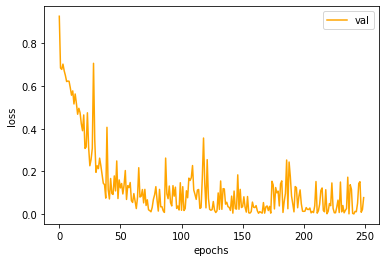

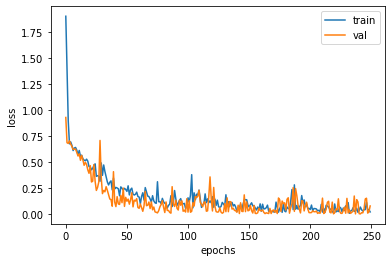

In [23]:
plot_history(history_32, 'loss')

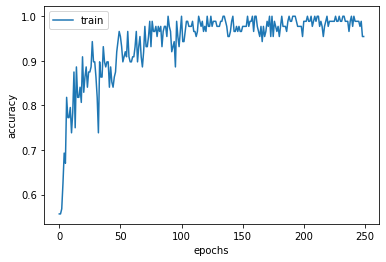

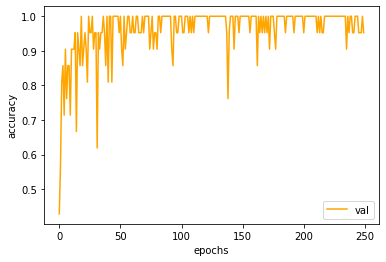

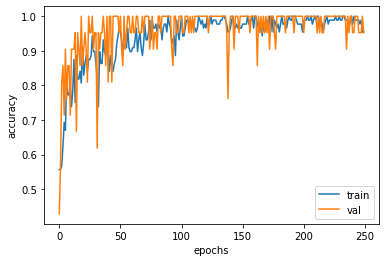

In [24]:
plot_history(history_64, 'accuracy')

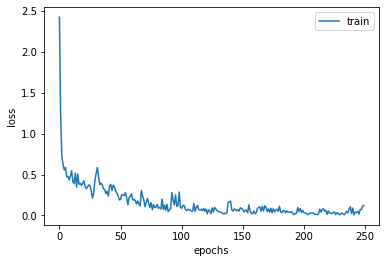

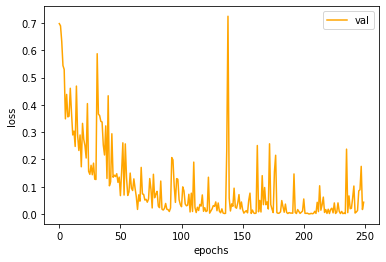

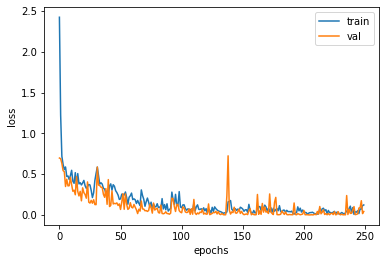

In [25]:
plot_history(history_64, 'loss')

# Testing

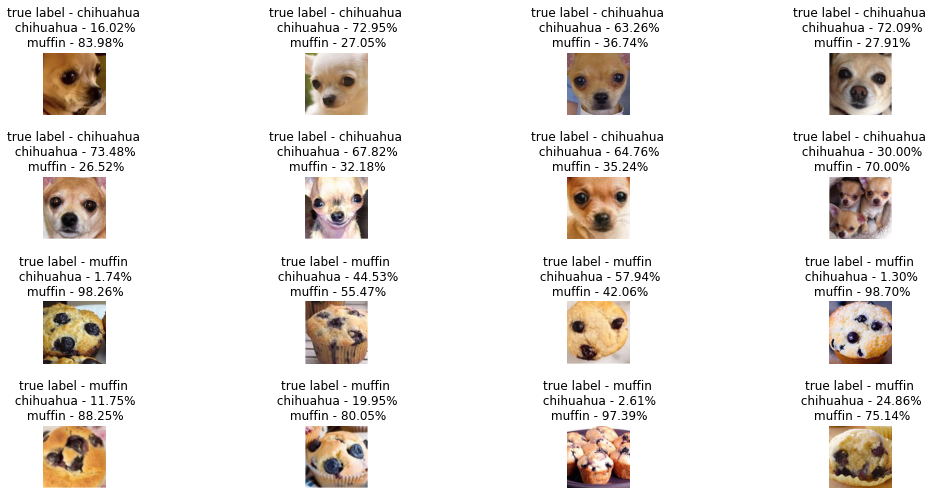

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.io import read_file
from tensorflow.io import decode_jpeg
from tensorflow.image import (convert_image_dtype,
                              resize)
from tensorflow import newaxis
from tensorflow import float32


TEST_CHIHUAHUA = os.path.join(os.getcwd(), 'dataset\\test\\Chihuahua')
TEST_MUFFIN = os.path.join(os.getcwd(), 'dataset\\test\\Muffin')


test_image_paths_chihuahua = [os.path.join(TEST_CHIHUAHUA, file_name) for file_name in os.listdir(TEST_CHIHUAHUA)]
test_image_paths_muffin = [os.path.join(TEST_MUFFIN, file_name) for file_name in os.listdir(TEST_MUFFIN)]

test_image_paths = test_image_paths_chihuahua + test_image_paths_muffin
true_labels = ['chihuahua'] * len(test_image_paths_chihuahua) + ['muffin'] * len(test_image_paths_muffin)

best_model_32 = load_model(MODEL_32_PATH)
best_model_64 = load_model(MODEL_64_PATH)


def load_image(path):
    raw = read_file(path)
    image = decode_jpeg(raw, channels=3)
    image = convert_image_dtype(image, float32)
    image = image[newaxis]
    return image


def show_predictions(model, test_image_paths, true_labels):
    fig, axes = plt.subplots(4, 4, figsize=(18, 8))
    axes = axes.flatten()

    for ax, test_image_path, label in zip(axes, test_image_paths, true_labels):
        image = plt.imread(test_image_path)
        ax.imshow(image)
        ax.set_axis_off()

        image = load_image(test_image_path)
        predict = model.predict(image)

        ax.set_title('true label - {}\n chihuahua - {:2.2%}\n muffin - {:2.2%}'.format(label, predict[0][0], predict[0][1]))

    plt.subplots_adjust(hspace=1)
    plt.show()
    

show_predictions(best_model_32, test_image_paths, true_labels)

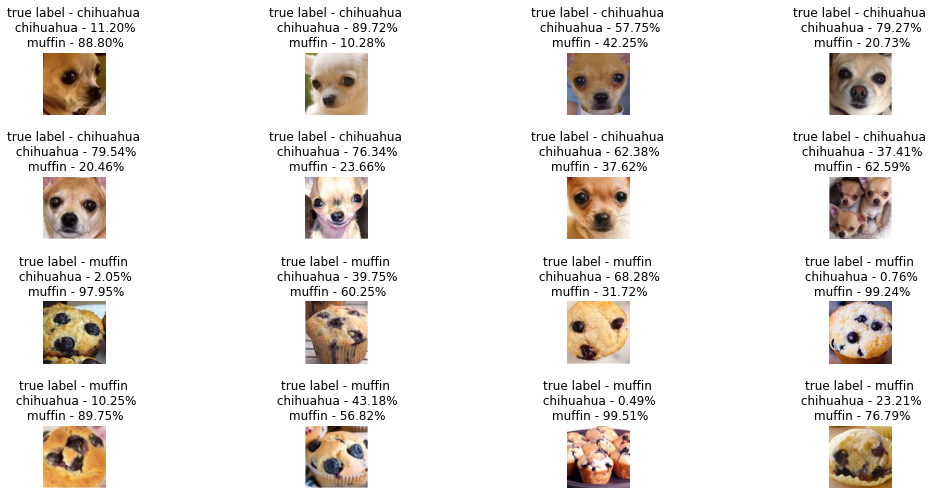

In [27]:
show_predictions(best_model_64, test_image_paths, true_labels)

In [28]:
best_model_32.evaluate(test_generator)

16/16 [==============================] - 0s 9ms/step - loss: 0.4604 - accuracy: 0.8125


[0.46041572093963623, 0.8125]

In [29]:
best_model_64.evaluate(test_generator)

16/16 [==============================] - 0s 18ms/step - loss: 0.4758 - accuracy: 0.8125


[0.475762277841568, 0.8125]